In [1]:
import os
import time

import keras
import keras.layers as kl
import keras.models as km
import keras.utils as ku
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.color as skc
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from skimage.io import imsave, imshow
from skimage.transform import resize
from tqdm import tqdm

2023-06-20 14:34:47.844477: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 14:34:47.864122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from train_autoencoder_vgg19 import predict_grayscale_to_rgb

In [3]:
# load encoder model
encoder_model = km.load_model('../models/encoder/vgg19_encoder.h5')

In [8]:
encoder_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [4]:
decoder_model = km.load_model('../models/decoder/decoder_model_vgg19_5/decoder_model_vgg19_5.h5')

In [7]:
decoder_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 256)       1179904   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        18464     
                                                        

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:15,  6.58it/s]/home/ds16028/dev/projects/cv-black-white-images-to-color/src/train_autoencoder_vgg19.py:122: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 36 negative Z values that have been clipped to zero
  rgb_img = skc.lab2rgb(cur)
 10%|█         | 10/100 [00:01<00:14,  6.42it/s]/home/ds16028/dev/projects/cv-black-white-images-to-color/src/train_autoencoder_vgg19.py:122: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 8 negative Z values that have been clipped to zero
  rgb_img = skc.lab2rgb(cur)
 20%|██        | 20/100 [00:03<00:12,  6.67it/s]/home/ds16028/dev/projects/cv-black-white-images-to-color/src/train_autoencoder_vgg19.py:122: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 9 negative Z values that have been clipped to zero
  rgb_img = skc.lab2rgb(cur)
 23%|██▎       | 23/100 [00:03<00:11,  6.63it/s]/home/ds16028/dev/projects/cv-black-white-images-to-

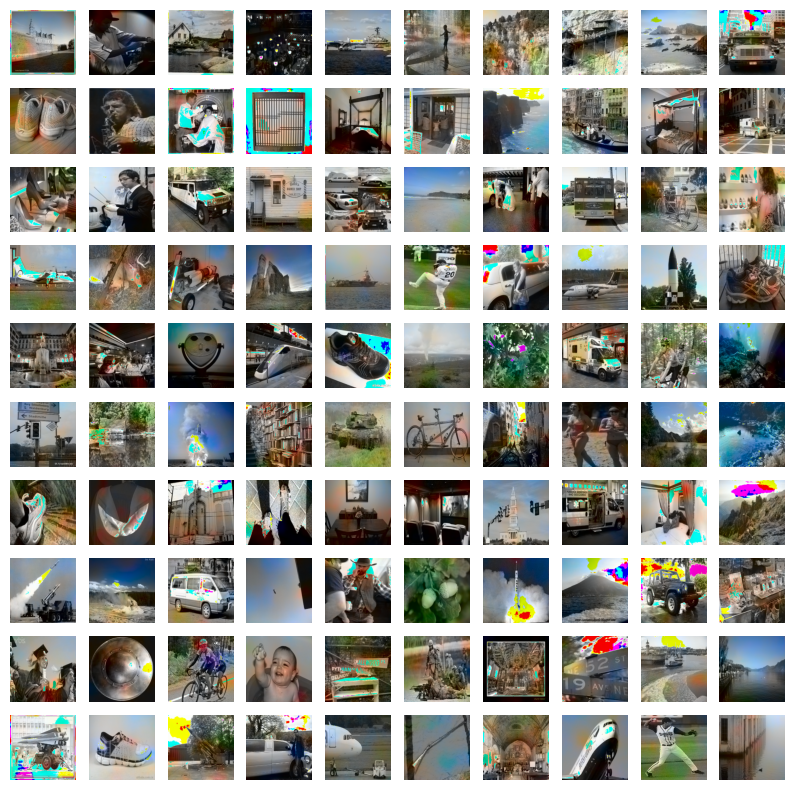

In [6]:
TEST_PATH = '../data/imagenet_data/test/color'
step = 100
files = [os.path.join(TEST_PATH, f) for f in os.listdir(TEST_PATH)][step:step+100]
preds = predict_grayscale_to_rgb(files, encoder_model, decoder_model)

# display images in grid
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i, rgb_img in enumerate(preds):
    ax[i//10, i%10].imshow(rgb_img)
    ax[i//10, i%10].axis('off')